In [57]:
#pip install keras-tuner

In [58]:
import matplotlib.pyplot as plt

In [59]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import optimizers
from keras_tuner import RandomSearch

from sklearn.metrics import accuracy_score, confusion_matrix

In [10]:
### Loading the dataset

(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
print(f"Shape of X train: {X_train.shape} and y train: {y_train.shape} ")
print(f"Shape of X test: {X_test.shape} and y test: {y_test.shape} ")

11490434/11490434 [==============================] - 0s 0us/step
Shape of X train: (60000, 28, 28) and y train: (60000,) 
Shape of X test: (10000, 28, 28) and y test: (10000,) 


In [43]:
### First five digits in train dataset
y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [37]:
### lets us see the first five digit images in train dataset
def image_show(data):
  l=[]
  for i in range(0,5):
    single_image = data[i]
    single_image.shape
    single_image = single_image.reshape(28,28)
    l.append(single_image)
  return l

  l = image_show(X_train)

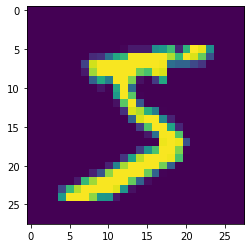

In [38]:
plt.imshow(l[0])

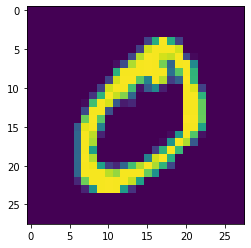

In [39]:
plt.imshow(l[1])

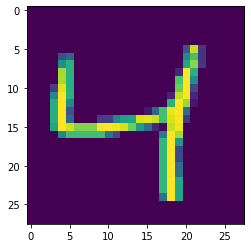

In [40]:
plt.imshow(l[2])

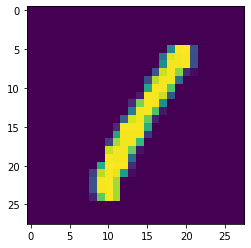

In [41]:
plt.imshow(l[3])

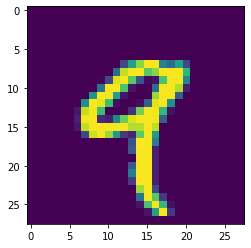

In [42]:
plt.imshow(l[4])

In [44]:
### Lets us convert the pixel values in train and test data between 0 and 1.
### for this we will divide each pixel value with highest pixel value i.e. 255

X_train = X_train/255
X_test = X_test/255

In [45]:
model = Sequential()

### Flattening the 3d array to id array
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [48]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',  metrics=['accuracy'])

In [49]:
model_history=model.fit(X_train, y_train, batch_size=10, epochs=10, validation_split=0.25)

Epoch 1/10
4500/4500 [==============================] - 14s 3ms/step - loss: 0.2365 - accuracy: 0.9311 - val_loss: 0.1356 - val_accuracy: 0.9618
Epoch 2/10
4500/4500 [==============================] - 11s 3ms/step - loss: 0.1023 - accuracy: 0.9693 - val_loss: 0.1219 - val_accuracy: 0.9642
Epoch 3/10
4500/4500 [==============================] - 12s 3ms/step - loss: 0.0712 - accuracy: 0.9778 - val_loss: 0.1016 - val_accuracy: 0.9698
Epoch 4/10
4500/4500 [==============================] - 12s 3ms/step - loss: 0.0522 - accuracy: 0.9835 - val_loss: 0.1022 - val_accuracy: 0.9723
Epoch 5/10
4500/4500 [==============================] - 12s 3ms/step - loss: 0.0401 - accuracy: 0.9876 - val_loss: 0.0998 - val_accuracy: 0.9725
Epoch 6/10
4500/4500 [==============================] - 11s 2ms/step - loss: 0.0309 - accuracy: 0.9902 - val_loss: 0.1031 - val_accuracy: 0.9737
Epoch 7/10
4500/4500 [==============================] - 12s 3ms/step - loss: 0.0251 - accuracy: 0.9915 - val_loss: 0.1131 - val_ac

In [50]:
y_prob = model.predict(X_test)

313/313 [==============================] - 0s 1ms/step


In [52]:
### Getting the predicted image digit
y_pred=y_prob.argmax(axis=1)

In [54]:
score = accuracy_score(y_test, y_pred)
score

0.9776

In [55]:
confusion_mat = confusion_matrix(y_test, y_pred)
confusion_mat

array([[ 968,    0,    1,    1,    1,    0,    3,    1,    2,    3],
       [   0, 1129,    1,    0,    0,    1,    1,    2,    1,    0],
       [   3,    4, 1005,    2,    3,    0,    4,    6,    4,    1],
       [   0,    1,    5,  983,    0,    8,    0,    5,    5,    3],
       [   2,    0,    0,    1,  951,    0,    5,    1,    1,   21],
       [   1,    0,    0,    6,    1,  873,    4,    1,    4,    2],
       [   4,    2,    1,    1,    3,    5,  941,    0,    1,    0],
       [   0,    3,    9,    4,    1,    0,    0, 1002,    4,    5],
       [   3,    1,    6,    6,    2,    7,    1,    4,  939,    5],
       [   0,    3,    0,    4,    4,    4,    0,    9,    0,  985]])

In [70]:
def build_model(hp):
  model= Sequential()
  model.add(Flatten(input_shape=(28,28)))
  counter=0
  
  for i in range(hp.Int('num_layers', min_value=1, max_value=10)):
    if counter==0:
      model.add(
          Dense(
              hp.Int('units'+str(i), min_value=8, max_value=128, step=8),
              activation=hp.Choice('activation'+str(i), values=['relu', 'tanh', 'sigmoid'])))
    else:
      model.add(
          Dense(
              hp.Int('units'+str(i), min_value=8, max_value=128, step=8),
              activation=hp.Choice('activation'+str(i), values=['relu', 'tanh', 'sigmoid'])
              ))
    counter+=1
  model.add(Dense(10, activation='softmax'))

  optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop', 'sgd', 'nadam', 'adadelta'])

  model.compile(optimizer= optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  return model

In [71]:
tuner= RandomSearch(build_model, objective='val_accuracy', max_trials=3, directory='dir_2')

In [72]:
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Trial 3 Complete [00h 00m 42s]
val_accuracy: 0.1264999955892563

Best val_accuracy So Far: 0.968500018119812
Total elapsed time: 00h 02m 07s


In [73]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 9,
 'units0': 120,
 'activation0': 'relu',
 'optimizer': 'adam',
 'units1': 32,
 'activation1': 'sigmoid',
 'units2': 8,
 'activation2': 'relu',
 'units3': 8,
 'activation3': 'relu',
 'units4': 8,
 'activation4': 'relu',
 'units5': 8,
 'activation5': 'relu',
 'units6': 8,
 'activation6': 'relu',
 'units7': 8,
 'activation7': 'relu',
 'units8': 8,
 'activation8': 'relu'}

In [74]:
model=tuner.get_best_models(num_models=1)[0]

In [75]:
model.fit(X_train, y_train, epochs=40, initial_epoch=5, validation_data=(X_test, y_test))

Epoch 6/40
1875/1875 [==============================] - 9s 4ms/step - loss: 0.0841 - accuracy: 0.9772 - val_loss: 0.1469 - val_accuracy: 0.9652
Epoch 7/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0739 - accuracy: 0.9792 - val_loss: 0.1402 - val_accuracy: 0.9695
Epoch 8/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0624 - accuracy: 0.9827 - val_loss: 0.1499 - val_accuracy: 0.9675
Epoch 9/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0588 - accuracy: 0.9836 - val_loss: 0.1462 - val_accuracy: 0.9689
Epoch 10/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0519 - accuracy: 0.9856 - val_loss: 0.1598 - val_accuracy: 0.9670
Epoch 11/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0470 - accuracy: 0.9865 - val_loss: 0.1488 - val_accuracy: 0.9702
Epoch 12/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0440 - accuracy: 0.9879 - val_loss: 0.1583 - val_accura